In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
#allow plot viewing in notebook
%matplotlib inline

#load regression libraries/modules needed
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## For k- mean Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
marijuana = pd.read_csv('marijuana_dataset.csv')
marijuana = marijuana[marijuana['state'] != 'California']
marijuana.head()

,state,state_code,dayspostlegal,distance,income,legal,month,ppg,quality_score,quantity,year
0,Colorado,8,253,2343.9370,48869,1,7,8.113011,3,28.349524,2013
1,Colorado,8,201,1947.1980,48869,1,5,7.054792,2,28.349524,2013
2,Colorado,8,193,2343.9370,48869,1,5,7.054792,3,28.349524,2013
3,Colorado,8,297,2358.2251,48869,1,8,8.465751,2,14.174762,2013
4,Colorado,8,200,2230.3601,48869,1,5,8.818490,2,28.349524,2013


In [ ]:
marijuana.drop(['year','state_code', 'month'], axis=1, inplace =True)
marijuana.head()

,state,dayspostlegal,distance,income,legal,ppg,quality_score,quantity
0,Colorado,253,2343.9370,48869,1,8.113011,3,28.349524
1,Colorado,201,1947.1980,48869,1,7.054792,2,28.349524
2,Colorado,193,2343.9370,48869,1,7.054792,3,28.349524
3,Colorado,297,2358.2251,48869,1,8.465751,2,14.174762
4,Colorado,200,2230.3601,48869,1,8.818490,2,28.349524


In [ ]:
marijuana.ppg.describe()

count    9306.000000
mean        8.529791
std         6.016775
min         1.000207
25%         5.291094
50%         7.760271
75%        10.582189
max       100.000000
Name: ppg, dtype: float64

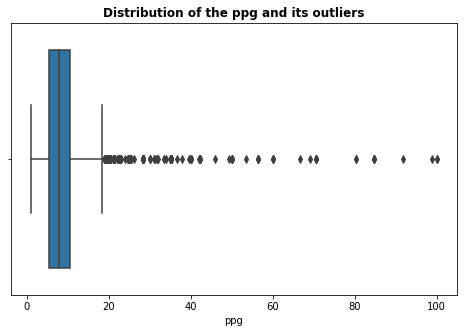

In [ ]:
# Another way to draw a diagram
plt.rcParams["figure.figsize"]=8,5
plt.title("Distribution of the ppg and its outliers", weight="bold")
sns.boxplot(x=marijuana.ppg)
plt.savefig("ppg.png")
plt.show()

In [ ]:
# Now we know we have outliers so we try to remove them
# We prepare first quarter and third quarter 
q1=marijuana.ppg.quantile(0.25)
q3=marijuana.ppg.quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR

In [ ]:
# Then we remove the outliers and create a new dataframe
marijuana = marijuana.loc[(marijuana.ppg > lower) & (marijuana.ppg < upper)]
marijuana.head()

,state,dayspostlegal,distance,income,legal,ppg,quality_score,quantity
0,Colorado,253,2343.9370,48869,1,8.113011,3,28.349524
1,Colorado,201,1947.1980,48869,1,7.054792,2,28.349524
2,Colorado,193,2343.9370,48869,1,7.054792,3,28.349524
3,Colorado,297,2358.2251,48869,1,8.465751,2,14.174762
4,Colorado,200,2230.3601,48869,1,8.818490,2,28.349524


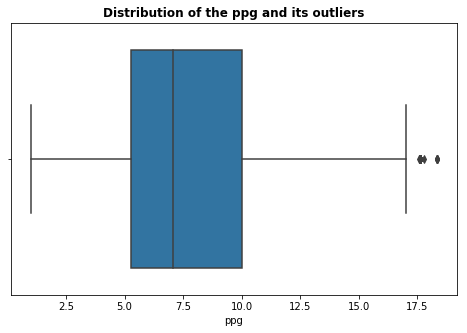

In [ ]:
# Another way to draw a diagram
plt.rcParams["figure.figsize"]=8,5
plt.title("Distribution of the ppg and its outliers", weight="bold")
sns.boxplot(x=marijuana.ppg)
plt.savefig("ppg.png")
plt.show()

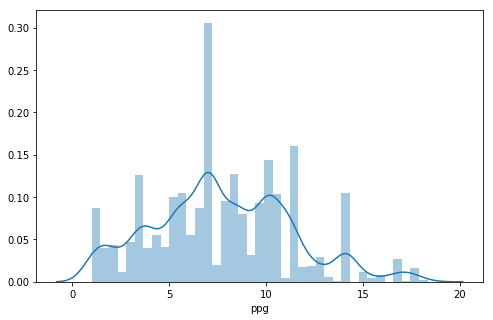

In [ ]:
sns.distplot(marijuana.ppg)

In [ ]:
##creating summy variable for state
marijuana = pd.concat([marijuana, pd.get_dummies(marijuana['state'], prefix='state', drop_first=True)], axis=1)
marijuana.head()

,state,dayspostlegal,distance,income,legal,ppg,quality_score,quantity,state_Nevada,state_New Mexico,state_Oregon,state_Washington
0,Colorado,253,2343.9370,48869,1,8.113011,3,28.349524,0,0,0,0
1,Colorado,201,1947.1980,48869,1,7.054792,2,28.349524,0,0,0,0
2,Colorado,193,2343.9370,48869,1,7.054792,3,28.349524,0,0,0,0
3,Colorado,297,2358.2251,48869,1,8.465751,2,14.174762,0,0,0,0
4,Colorado,200,2230.3601,48869,1,8.818490,2,28.349524,0,0,0,0


### Creating a copy dataset for discretizing by ppg later

In [ ]:
#making a copy for use later during discretization by ppg
marijuana_disc = marijuana 

In [ ]:
numerical_variable = ['quantity']
x = marijuana[numerical_variable]
x=np.log(x)
y = marijuana['ppg']

In [ ]:
import statsmodels.api as sm
x2=sm.add_constant(x)
ols_model = sm.OLS(y, x2).fit()
ols_model.summary()

C:\Users\srija\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1571.
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          1.30e-316
Time:                        12:33:10   Log-Likelihood:                -23454.
No. Observations:                8959   AIC:                         4.691e+04
Df Residuals:                    8957   BIC:                         4.693e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8339      0.109    108.856      0.000      11.621      12.047
quantity      -1.5766      0.040    -39.630      0.000      -1.655      -1.499
==============================================================================
Omnibus:                      103.305   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.106
Skew:                           0.219   Prob(JB):                     6.14e-26
Kurtosis:                       3.344   Cond. No.                         9.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

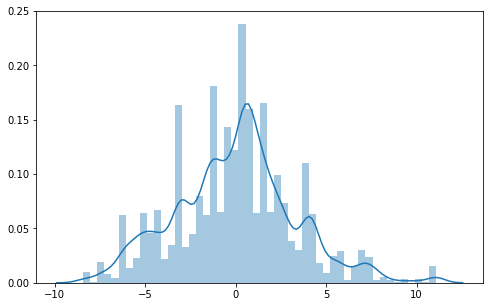

In [ ]:
y_pred = ols_model.predict(x2)
residual =ols_model.resid
sns.distplot(residual)

In [ ]:
# Define a function or method
# For simplicity first define a method for formatting result
def formatResult(x):
    convert=pd.Series(x)
    labels = ["LM Statistic",
          "LM-Test p-value",
          "F-Statistic",
          "F-Test p-value"] 
    displayFormat=pd.DataFrame({"Name":labels,
                         "Test Result": convert.map('{:.4f}'.format)} )
    return displayFormat

In [ ]:
# homoskedasticity test
import statsmodels
breuschpagan_test = statsmodels.stats.diagnostic.het_breuschpagan(residual, x)
formatResult(breuschpagan_test)

,Name,Test Result
0,LM Statistic,2300.4407
1,LM-Test p-value,nan
2,F-Statistic,3094.8659
3,F-Test p-value,0.0000


In [ ]:
### Regression 2  (independent variable: 'quantity','legal)

In [ ]:
numerical_variable = ['quantity','legal']
x = marijuana[numerical_variable]
y = marijuana['ppg']
import statsmodels.api as sm
x2=sm.add_constant(x)
ols_model = sm.OLS(y, x2).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     664.5
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          8.19e-270
Time:                        12:33:11   Log-Likelihood:                -23558.
No. Observations:                8959   AIC:                         4.712e+04
Df Residuals:                    8956   BIC:                         4.714e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9639      0.073    136.750      0.000       9.821      10.107
quantity      -0.1173      0.003    -36.090      0.000      -0.124      -0.111
legal         -0.2657      0.073     -3.639      0.000      -0.409      -0.123
==============================================================================
Omnibus:                       78.766   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.358
Skew:                           0.181   Prob(JB):                     3.95e-20
Kurtosis:                       3.329   Cond. No.                         50.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

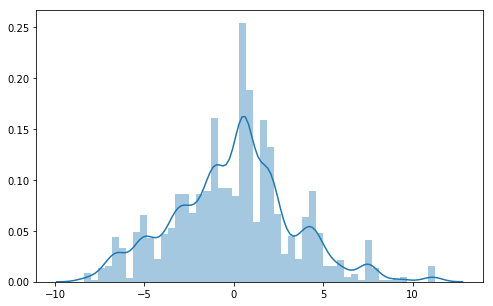

In [ ]:
y_pred = ols_model.predict(x2)
residual =ols_model.resid
sns.distplot(residual)

In [ ]:
import statsmodels
breuschpagan_test = statsmodels.stats.diagnostic.het_breuschpagan(residual, x)
formatResult(breuschpagan_test)

,Name,Test Result
0,LM Statistic,1814.3617
1,LM-Test p-value,0.0000
2,F-Statistic,1137.3031
3,F-Test p-value,0.0000


In [ ]:
## Regression3 (independent variable : 'ln(quantity)','legal, 'dayspostlegal')

In [ ]:
numerical_variable = ['quantity']
x = marijuana[numerical_variable]
x=np.log(x)
x['legal']= marijuana['legal'] 
x['dayspostlegal'] = marijuana['dayspostlegal']
y = marijuana['ppg']
import statsmodels.api as sm
x2=sm.add_constant(x)
ols_model = sm.OLS(y, x2).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     528.8
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          1.97e-316
Time:                        12:33:11   Log-Likelihood:                -23447.
No. Observations:                8959   AIC:                         4.690e+04
Df Residuals:                    8955   BIC:                         4.693e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.9223      0.111    107.214      0.000      11.704      12.140
quantity         -1.5710      0.040    -39.486      0.000      -1.649      -1.493
legal            -0.2635      0.083     -3.174      0.002      -0.426      -0.101
dayspostlegal -3.133e-05      0.000     -0.128      0.898      -0.001       0.000
==============================================================================
Omnibus:                      102.226   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.093
Skew:                           0.214   Prob(JB):                     6.18e-26
Kurtosis:                       3.357   Cond. No.                         602.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

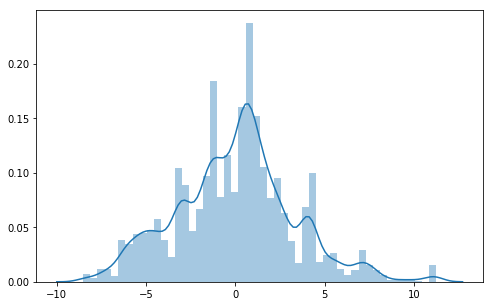

In [ ]:
y_pred = ols_model.predict(x2)
residual =ols_model.resid
sns.distplot(residual)

In [ ]:
breuschpagan_test = statsmodels.stats.diagnostic.het_breuschpagan(residual, x)
formatResult(breuschpagan_test)

,Name,Test Result
0,LM Statistic,2300.2851
1,LM-Test p-value,0.0000
2,F-Statistic,1031.2978
3,F-Test p-value,0.0000


In [ ]:
## Regression 4 (independent variable : 'ln(quantity)','legal, 'dayspostlegal', ln(quality_score))

In [ ]:
numerical_variable = ['quantity','quality_score']
x = marijuana[numerical_variable]
x= np.log(x)
x['legal']= marijuana['legal'] 
x['dayspostlegal'] = marijuana['dayspostlegal']
y = marijuana['ppg']
import statsmodels.api as sm
x2=sm.add_constant(x)
ols_model = sm.OLS(y, x2).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     497.4
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:33:11   Log-Likelihood:                -23279.
No. Observations:                8959   AIC:                         4.657e+04
Df Residuals:                    8954   BIC:                         4.660e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.7207      0.161     60.216      0.000       9.404      10.037
quantity         -1.6245      0.039    -41.489      0.000      -1.701      -1.548
quality_score     2.6643      0.144     18.510      0.000       2.382       2.946
legal            -0.3010      0.082     -3.693      0.000      -0.461      -0.141
dayspostlegal     0.0002      0.000      0.715      0.474      -0.000       0.001
==============================================================================
Omnibus:                      146.925   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.398
Skew:                           0.261   Prob(JB):                     6.04e-38
Kurtosis:                       3.432   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

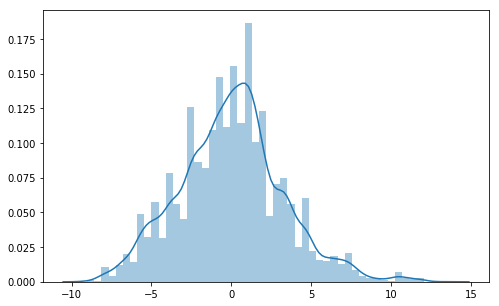

In [ ]:
y_pred = ols_model.predict(x2)
residual =ols_model.resid
sns.distplot(residual)

In [ ]:
breuschpagan_test = statsmodels.stats.diagnostic.het_breuschpagan(residual, x)
formatResult(breuschpagan_test)

,Name,Test Result
0,LM Statistic,2404.2627
1,LM-Test p-value,0.0000
2,F-Statistic,821.1684
3,F-Test p-value,0.0000


In [ ]:
## Regression 5 (independent variable : 'ln(quantity)','legal, 'dayspostlegal', ln(quality_score), ln('distance'))

In [ ]:
numerical_variable = ['quantity','quality_score','distance']
x = marijuana[numerical_variable]
x= np.log(x)
x['legal']= marijuana['legal'] 
x['dayspostlegal'] = marijuana['dayspostlegal']
y = marijuana['ppg']
import statsmodels.api as sm
x2=sm.add_constant(x)
ols_model = sm.OLS(y, x2).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     435.3
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:33:11   Log-Likelihood:                -23203.
No. Observations:                8959   AIC:                         4.642e+04
Df Residuals:                    8953   BIC:                         4.646e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.8841      0.996     21.975      0.000      19.932      23.836
quantity         -1.6020      0.039    -41.218      0.000      -1.678      -1.526
quality_score     2.6112      0.143     18.286      0.000       2.331       2.891
distance         -1.5540      0.126    -12.375      0.000      -1.800      -1.308
legal            -0.0662      0.083     -0.797      0.425      -0.229       0.097
dayspostlegal    -0.0002      0.000     -0.968      0.333      -0.001       0.000
==============================================================================
Omnibus:                      112.470   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.042
Skew:                           0.196   Prob(JB):                     2.36e-31
Kurtosis:                       3.474   Cond. No.                     5.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

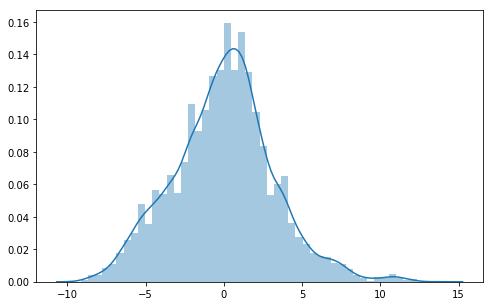

In [ ]:
y_pred = ols_model.predict(x2)
residual =ols_model.resid
sns.distplot(residual)

In [ ]:
breuschpagan_test = statsmodels.stats.diagnostic.het_breuschpagan(residual, x)
formatResult(breuschpagan_test)

,Name,Test Result
0,LM Statistic,2551.8180
1,LM-Test p-value,0.0000
2,F-Statistic,713.2302
3,F-Test p-value,0.0000


In [ ]:
## Regression 6 (independent variable : 'ln(quantity)','legal, 'dayspostlegal', ln(quality_score), ln('distance') and state dummies) 

In [ ]:
numerical_variable = ['quantity','quality_score','distance']
x = marijuana[numerical_variable]
x= np.log(x)
x['legal']= marijuana['legal'] 
x['state_Nevada'] = marijuana['state_Nevada']
x['state_Washington'] = marijuana['state_Washington']
x['state_Oregon'] = marijuana['state_Oregon'] 
x['state_Oregon'] = marijuana['state_Oregon']
x['state_New Mexico'] = marijuana['state_New Mexico']
y = marijuana['ppg']
import statsmodels.api as sm
x2=sm.add_constant(x)
ols_model = sm.OLS(y, x2).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     287.9
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:33:12   Log-Likelihood:                -23152.
No. Observations:                8959   AIC:                         4.632e+04
Df Residuals:                    8950   BIC:                         4.639e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               27.1407      3.539      7.669      0.000      20.203      34.078
quantity            -1.6009      0.039    -41.399      0.000      -1.677      -1.525
quality_score        2.6512      0.142     18.676      0.000       2.373       2.929
distance            -2.2727      0.457     -4.978      0.000      -3.168      -1.378
legal               -0.1826      0.092     -1.978      0.048      -0.363      -0.002
state_Nevada         0.3280      0.176      1.860      0.063      -0.018       0.674
state_Washington     0.9529      0.201      4.744      0.000       0.559       1.347
state_Oregon         0.0875      0.191      0.459      0.646      -0.287       0.462
state_New Mexico     0.2400      0.227      1.058      0.290      -0.205       0.685
==============================================================================
Omnibus:                      129.044   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.835
Skew:                           0.188   Prob(JB):                     3.99e-39
Kurtosis:                       3.576   Cond. No.                         890.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

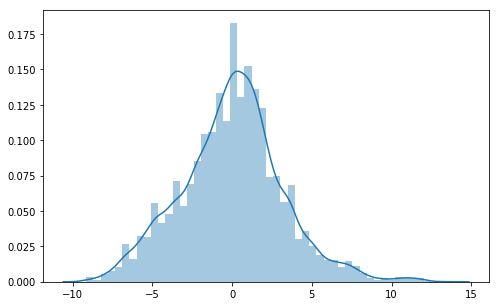

In [ ]:
y_pred = ols_model.predict(x2)
residual =ols_model.resid
sns.distplot(residual)

In [ ]:
breuschpagan_test = statsmodels.stats.diagnostic.het_breuschpagan(residual, x)
formatResult(breuschpagan_test)

,Name,Test Result
0,LM Statistic,2604.1792
1,LM-Test p-value,0.0000
2,F-Statistic,458.5103
3,F-Test p-value,0.0000


In [ ]:
### regression 7  (independent variable : 'ln(quantity)','legal, 'dayspostlegal', ln(quality_score), ln('distance'),ln('income') and state dummies) 

In [ ]:
numerical_variable = ['quantity','quality_score','distance','income']
x = marijuana[numerical_variable]
x= np.log(x)
x['legal']= marijuana['legal'] 
x['state_Nevada'] = marijuana['state_Nevada']
x['state_Washington'] = marijuana['state_Washington']
x['state_Oregon'] = marijuana['state_Oregon']
x['state_Oregon'] = marijuana['state_Oregon']
x['state_New Mexico'] = marijuana['state_New Mexico']
y = marijuana['ppg']
import statsmodels.api as sm
x2=sm.add_constant(x)
ols_model = sm.OLS(y, x2).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     255.9
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:33:12   Log-Likelihood:                -23152.
No. Observations:                8959   AIC:                         4.632e+04
Df Residuals:                    8949   BIC:                         4.640e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.5602     31.261      0.946      0.344     -31.718      90.838
quantity            -1.6009      0.039    -41.386      0.000      -1.677      -1.525
quality_score        2.6511      0.142     18.674      0.000       2.373       2.929
distance            -2.2724      0.457     -4.977      0.000      -3.167      -1.377
income              -0.2251      2.889     -0.078      0.938      -5.888       5.438
legal               -0.1785      0.106     -1.680      0.093      -0.387       0.030
state_Nevada         0.2872      0.552      0.520      0.603      -0.795       1.370
state_Washington     0.9515      0.202      4.720      0.000       0.556       1.347
state_Oregon         0.0462      0.564      0.082      0.935      -1.060       1.153
state_New Mexico     0.1757      0.857      0.205      0.837      -1.503       1.855
==============================================================================
Omnibus:                      128.946   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.680
Skew:                           0.188   Prob(JB):                     4.31e-39
Kurtosis:                       3.576   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

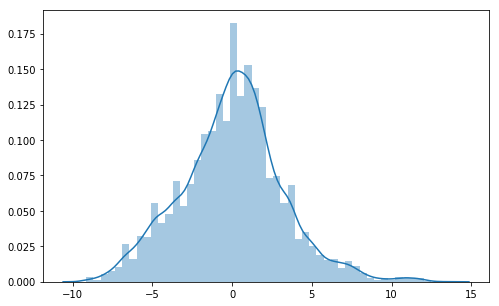

In [ ]:
y_pred = ols_model.predict(x2)
residual =ols_model.resid
sns.distplot(residual)

In [ ]:
breuschpagan_test = statsmodels.stats.diagnostic.het_breuschpagan(residual, x)
formatResult(breuschpagan_test)

,Name,Test Result
0,LM Statistic,2611.0762
1,LM-Test p-value,0.0000
2,F-Statistic,409.0424
3,F-Test p-value,0.0000


### Discretization of Price into 2 Categories
Because we cannot find any meaningful prediction for predicting ppg for the five states we are modeling sales for, we are going to try to discretize our dataset by ppg into 2 bins of high and low ppg (price per gram). We use the whole dataset before removing outliers.

In [ ]:
#reset index for use later 
marijuana_disc.reset_index(drop=True, inplace=True)
#copy of dataset made earlier
marijuana_disc.head()

,state,dayspostlegal,distance,income,legal,ppg,quality_score,quantity,state_Nevada,state_New Mexico,state_Oregon,state_Washington
0,Colorado,253,2343.9370,48869,1,8.113011,3,28.349524,0,0,0,0
1,Colorado,201,1947.1980,48869,1,7.054792,2,28.349524,0,0,0,0
2,Colorado,193,2343.9370,48869,1,7.054792,3,28.349524,0,0,0,0
3,Colorado,297,2358.2251,48869,1,8.465751,2,14.174762,0,0,0,0
4,Colorado,200,2230.3601,48869,1,8.818490,2,28.349524,0,0,0,0


In [ ]:
#import kbins discretizor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import Ridge
!pip install yellowbrick -q
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
#define dependent and independent variables
x = marijuana_disc.drop(['ppg', 'state'], axis=1)
#remove non-ordinal categorical features and averages before binning
x_num = x[['dayspostlegal','distance','quality_score','quantity']]
x_cat = x[['legal', 'state_Nevada','state_Washington','state_New Mexico','state_Oregon']]
y = marijuana_disc['ppg']

#create bins encoder
enc = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')
#discretize ppg independent variables
enc.fit(x_num)

KBinsDiscretizer(encode='ordinal', n_bins=2, strategy='kmeans')

In [ ]:
#tranform data into bins using kmeans cluster method
x_b = enc.transform(x_num) 
#store in a dataframe
x_bins = pd.DataFrame(x_b)
x_bins.rename(columns={0:'dayspostlegal', 1:'distance', 2:'quality_score', 3:'quantity'}, inplace=True)
x_bins.head()

,dayspostlegal,distance,quality_score,quantity
0,1.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0


In [ ]:
#transforming binned independent variables back to original form
x_binned = enc.inverse_transform(x_bins)
#Store in a dataframe
x_bin = pd.DataFrame(x_binned)
x_bin.rename(columns={0:'dayspostlegal', 1:'distance', 2:'quality_score', 3:'quantity'}, inplace=True)
x_bin.head()

,dayspostlegal,distance,quality_score,quantity
0,197.482462,1879.468883,2.739178,22.962241
1,197.482462,1879.468883,1.739178,22.962241
2,197.482462,1879.468883,2.739178,22.962241
3,197.482462,1879.468883,1.739178,9.287479
4,197.482462,1879.468883,1.739178,22.962241


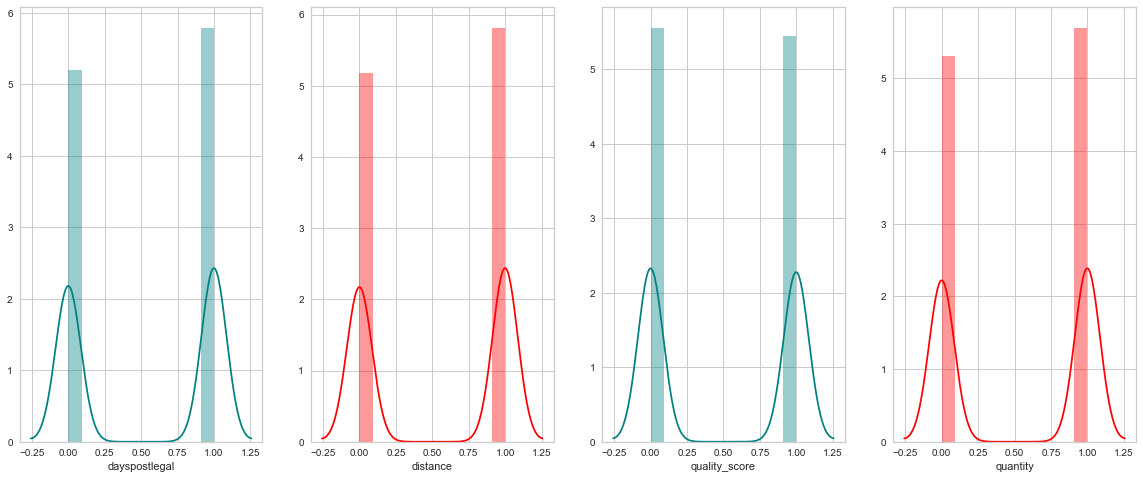

In [ ]:
#see the two bins for each numerical variable
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(20, 8), ncols=4)
sns.distplot(x_bins['dayspostlegal'], color='teal', ax=ax1)
sns.distplot(x_bins['distance'], color='red', ax=ax2)
sns.distplot(x_bins['quality_score'], color='teal', ax=ax3)
sns.distplot(x_bins['quantity'], color='red',ax=ax4)

### Predictions of ppg after discretizing independent variables:
We hope that our varied interpretation of x will help us more than just predicting ppg from the features. 
- Will start with predicting with just discretized numerical features, 
- try discretized variables and the dummies after for comparison.
- Secondly, will try predicting with the transformed numerical features along with the other dummies and compare with when they are inversed values

### a) Predicting using inverse discretized values without dummies

In [ ]:
#define linear regression
disc_reg = LinearRegression()

#using inverse discretized with other dummies to predict y
x_disc_all_dummies = pd.concat([x_bin, x_cat], axis=1)
print('Discretized x columns:', x_bin.shape[1], 'Original dummies:',x_cat.shape[1])

Discretized x columns: 4 Original dummies: 5


In [ ]:
x_disc_all_dummies.shape

(8959, 9)

In [ ]:
disc_reg.fit(x_disc_all_dummies, y)
#y predicted with inverse discretized
y_disc_pred = disc_reg.predict(x_disc_all_dummies)
residuals = y_disc_pred - y

In [ ]:
pd.DataFrame(y_disc_pred).head()

,0
0,6.978275
1,5.855022
2,6.978275
3,8.307684
4,5.855022


Text(0.5, 1.0, 'Predicted Y vs. Residuals')

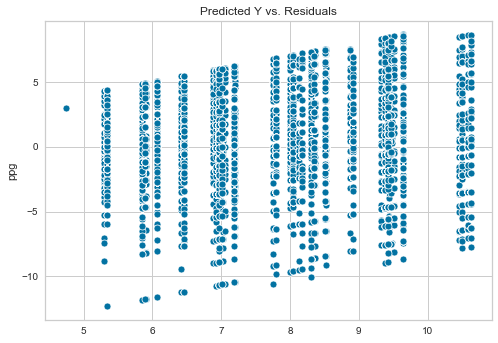

In [ ]:
#formatting
bold = '\033[1m'
end = '\033[0m'
sns.scatterplot(y_disc_pred, residuals)
ax = plt.gca()
ax.set_title("Predicted Y vs. Residuals")

In [ ]:
#Model measures display method
#r squared
def measures(x, y, y_pred, note):
    r2 = r2_score(y, y_pred)
    print(bold + 'Model Measures:' + note + end)
    print(bold+'R Squared: '+end, r2.round(5))
    #adjusted r2
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print(bold+'Adjusted R Squared: '+end, adj_r2.round(5))
    print(bold+'MSE: '+end,mean_squared_error(y, y_pred).round(5))
    
measures(x_disc_all_dummies ,y, y_disc_pred,'')

Model Measures:
R Squared:  0.15926
Adjusted R Squared:  0.15842
MSE:  10.87108


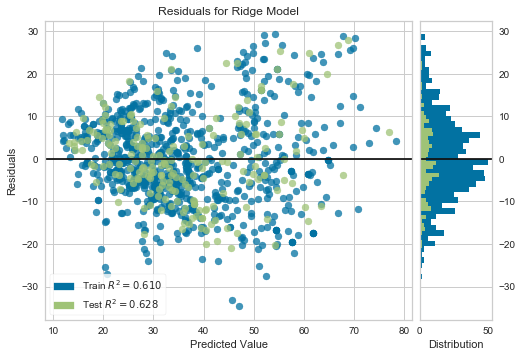

In [ ]:
#visualizer with residuals
x_disc_all_dummies, y = load_concrete()
#split into train and test
x_train, x_test, y_train, y_test = train_test_split(x_disc_all_dummies, y, test_size=0.2, random_state=42)
#evaluate and display
model = Ridge()
visualizer = ResidualsPlot(model)
#fit the train data
visualizer.fit(x_train, y_train)
#test with test data
visualizer.score(x_test, y_test)
#display residuals
visualizer.show()

### Predicting ppg for each quantity segment
Predictors of price for each quantity segment: distance, state, dayspostlegal, distance, legal, quality_score and state dummies

Text(0.5, 1.0, 'PPG vs. Quantity')

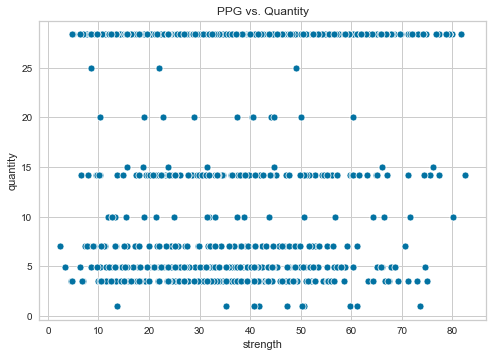

In [ ]:
sns.scatterplot(y, x['quantity'])
ax = plt.gca()
ax.set_title("PPG vs. Quantity")

In [ ]:
#Quantity split
quantities = marijuana_disc['quantity'].unique()
print(quantities)
#split data frame for distribution based on quantities
#for q in quantities:
def quantity_plots(q):
    #define subset dataframe
    data = marijuana[marijuana.quantity == q]
    #define plots
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    ax1.set_title('Quantity: {} grams'.format(q))
    ax2.set_title('Predicted ppg vs residuals')
    #predict ppg based on values for this segment of quantity
    x = data.drop(['quantity', 'ppg','state', 'income'], axis=1)
    y = data['ppg']
    #model and measures
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    residuals = y_pred - y
    #Measures = print measures for model
    measures(x, y, y_pred, ' Quantity = {} grams'.format(q))
    print('\n')
    #plot of distribution and predictions versus residuals
    sns.distplot(data['ppg'], ax=ax1)
    sns.scatterplot(y_pred, residuals, ax=ax2)

[28.349524  14.174762   3.5436904  4.9895163  7.0873809  1.
 19.986414  14.996898  10.007381  25.00428  ]


Model Measures: Quantity = 28.349524 grams
R Squared:  0.06099
Adjusted R Squared:  0.0593
MSE:  9.0018


Model Measures: Quantity = 14.174762 grams
R Squared:  0.11483
Adjusted R Squared:  0.10692
MSE:  8.05791


Model Measures: Quantity = 3.5436904 grams
R Squared:  0.11964
Adjusted R Squared:  0.11436
MSE:  9.26386


Model Measures: Quantity = 4.9895163 grams
R Squared:  0.04182
Adjusted R Squared:  0.03357
MSE:  12.22043


Model Measures: Quantity = 7.087380900000001 grams
R Squared:  0.09047
Adjusted R Squared:  0.08038
MSE:  9.52679


Model Measures: Quantity = 1.0 grams
R Squared:  0.16358
Adjusted R Squared:  0.1033
MSE:  2.74154


Model Measures: Quantity = 19.986414 grams
R Squared:  0.11428
Adjusted R Squared:  0.06943
MSE:  4.39575


Model Measures: Quantity = 14.996898000000002 grams
R Squared:  0.08935
Adjusted R Squared:  -0.03413
MSE:  7.24959


Model Measures: Quantity = 10.007381 grams
R Squared:  0.09156
Adjusted R Squared:  0.05611
MSE:  12.05304


Model Measures: Q

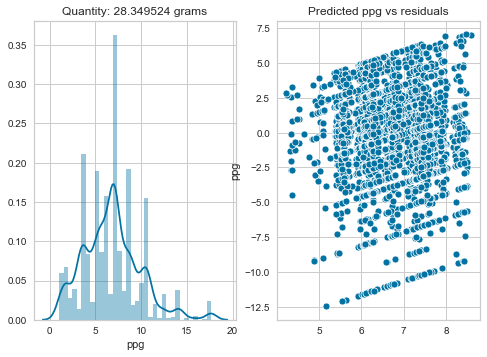

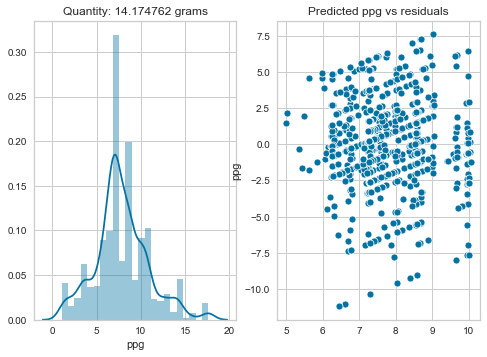

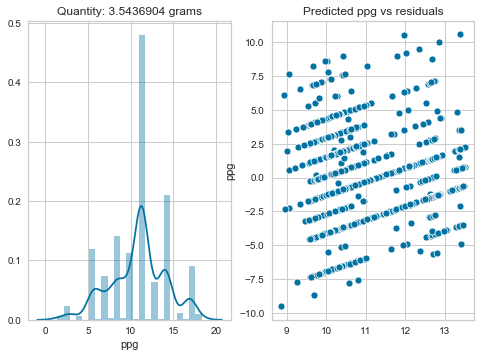

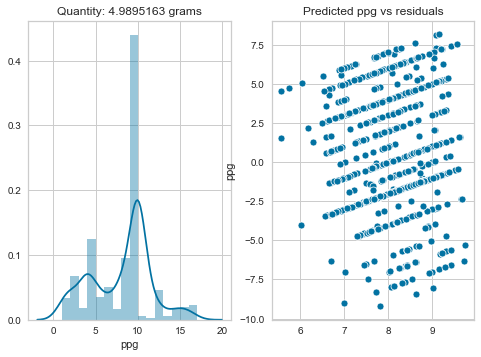

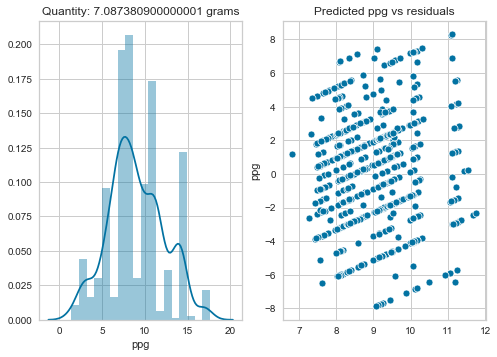

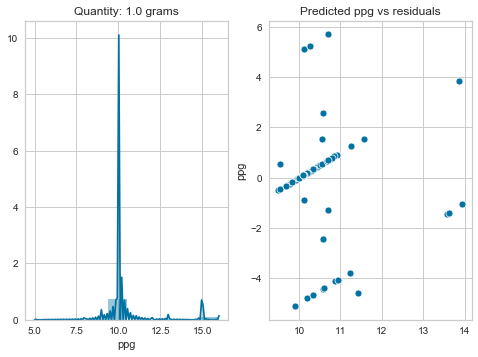

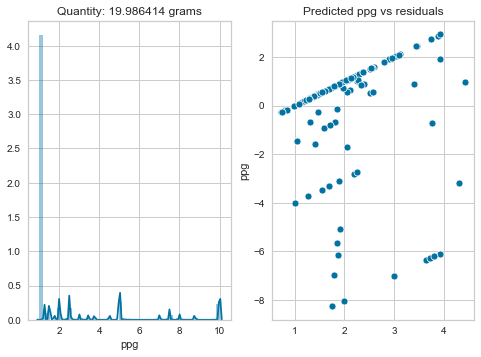

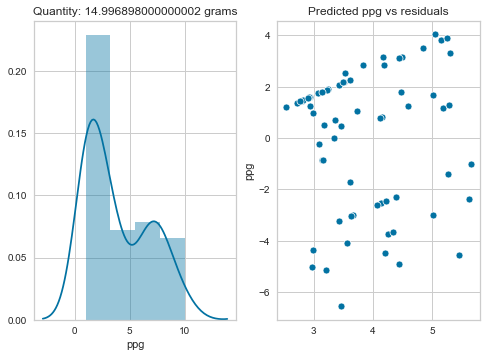

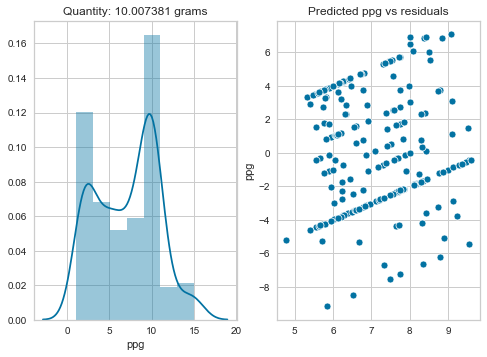

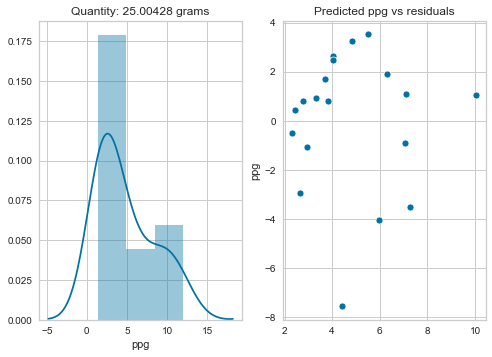

In [ ]:
#display distribution and predictions for each quantity group
for q in quantities: quantity_plots(q)

### Binning by PPG

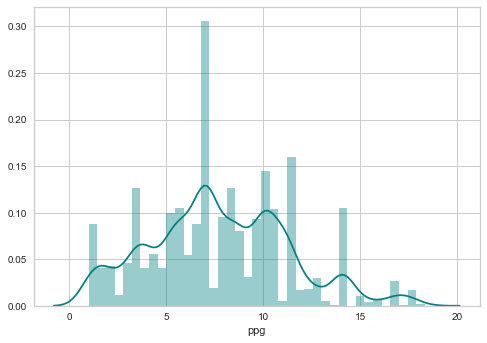

In [ ]:
#ppg plot
sns.distplot(marijuana_disc['ppg'], color='teal')

In [ ]:
#bins for ppg
vals = marijuana_disc.ppg.unique()
#define bins
bins = pd.cut(vals, 2, retbins=True)
#bins boundaries for ppg
b = pd.DataFrame(bins[1])
low = b.iloc[0,0]
high = b.iloc[1,0]

In [ ]:
#define bin column
marijuana_disc['ppg_bin'] = ''
#between ppg 0.97 and 14.609688
marijuana_disc.loc[marijuana_disc['ppg'] > low,'ppg_bin'] = 'Low'
#between ppg 14.609688 and 28.219170
marijuana_disc.loc[marijuana_disc['ppg'] > high,'ppg_bin'] = 'high' 

In [ ]:
#see updated ppg bins
marijuana_disc.head()

,state,dayspostlegal,distance,income,legal,ppg,quality_score,quantity,state_Nevada,state_New Mexico,state_Oregon,state_Washington,ppg_bin
0,Colorado,253,2343.9370,48869,1,8.113011,3,28.349524,0,0,0,0,Low
1,Colorado,201,1947.1980,48869,1,7.054792,2,28.349524,0,0,0,0,Low
2,Colorado,193,2343.9370,48869,1,7.054792,3,28.349524,0,0,0,0,Low
3,Colorado,297,2358.2251,48869,1,8.465751,2,14.174762,0,0,0,0,Low
4,Colorado,200,2230.3601,48869,1,8.818490,2,28.349524,0,0,0,0,Low


In [ ]:
#category dummy variables
dummies = pd.get_dummies(marijuana_disc['ppg_bin'], prefix='ppg',drop_first=True) #low dropped
data_ppg = pd.concat([marijuana_disc, dummies], axis=1)
data_ppg.drop(['state', 'income','ppg_bin', 'ppg'],axis=1,inplace=True)
data_ppg.head()

,dayspostlegal,distance,legal,quality_score,quantity,state_Nevada,state_New Mexico,state_Oregon,state_Washington,ppg_high
0,253,2343.9370,1,3,28.349524,0,0,0,0,0
1,201,1947.1980,1,2,28.349524,0,0,0,0,0
2,193,2343.9370,1,3,28.349524,0,0,0,0,0
3,297,2358.2251,1,2,14.174762,0,0,0,0,0
4,200,2230.3601,1,2,28.349524,0,0,0,0,0


In [ ]:
#prediction using classification
#define dependent and independent variables
X = data_ppg.drop(['ppg_high'], axis=1)
Y = data_ppg['ppg_high']
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=500)
class_tree = DecisionTreeClassifier(max_depth=3)
#fit model using training data
class_tree.fit(x_train, y_train)
#predict y values from model
ytr_hat = class_tree.predict(x_train)
accuracy = accuracy_score(y_true=y_train, y_pred=ytr_hat)
print('Accuracy score: ',accuracy.round(5))

Accuracy score:  0.75981


In [ ]:
#create and display a contigency table
tr_conf_matrix = pd.crosstab(y_train, ytr_hat, rownames=['True Y'], colnames=['Pred Y >>'], margins=True)
tr_conf_matrix

Pred Y >>,0,1,All
True Y,,,
0,3015,561,3576
1,730,1069,1799
All,3745,1630,5375


In [ ]:
#define model to calculate measures
def model_measures(conf_matrix):
    #Precision for both purchase codes = xx/classfied(x)
    prec_no = conf_matrix.iloc[0,0]/conf_matrix.iloc[2,0]
    prec_yes = conf_matrix.iloc[1,1]/conf_matrix.iloc[2,1]

    #Recall for both purchase codes = xx/actual(x)
    recall_no = conf_matrix.iloc[0,0]/conf_matrix.iloc[0,2]
    recall_yes = conf_matrix.iloc[1,1]/conf_matrix.iloc[1,2]

    #F-Measure for both purchase codes = (2*p*r)/(p+r)
    fno = (2* prec_no * recall_no)/(prec_no + recall_no)
    fyes = (2* prec_yes * recall_yes)/(prec_yes + recall_yes)
    result = ''
    #Get results
    values = '**Precision:** low ppg = ${}$, high ppg = ${}$  \n'.format(prec_yes.round(5), prec_no.round(5))+\
      '**Recall:** low ppg = ${}$, high ppg = ${}$  \n'.format(recall_yes.round(5), recall_no.round(5)) +\
      '**F-Measure:** low ppg = ${}$, high ppg = ${}$'.format(fyes.round(5), fno.round(5))
    return values

#show values for training data predictions
md(model_measures(tr_conf_matrix))

**Precision:** low ppg = $0.65583$, high ppg = $0.80507$  
**Recall:** low ppg = $0.59422$, high ppg = $0.84312$  
**F-Measure:** low ppg = $0.62351$, high ppg = $0.82366$

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=81b136ac-6d16-4fba-84b8-02f07bcf9435' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>